# For each epic, I'll visualize some data and look for a trend, relationship, or pattern.


Start with imports


In [1]:
import dotenv
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import os
import numpy as np
import seaborn as sns

dotenv.load_dotenv()

True

In [2]:
# Start db
def create_conn():
    driver = os.getenv("DB_DRIVER")
    server = os.getenv("DB_SERVER")
    database = os.getenv("DB_NAME")
    trusted_connection = os.getenv("DB_TRUSTED_CONNECTION")

    return create_engine(
        f"mssql+pyodbc://{server}/{database}?trusted_connection={trusted_connection}&driver={driver}"
    )


engine = create_conn()
# Test connection
connection = engine.connect()
res = connection.execute(text("SELECT @@version;")).fetchone()
connection.close()
res[0]

'Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \n\tOct  8 2022 05:58:25 \n\tCopyright (C) 2022 Microsoft Corporation\n\tDeveloper Edition (64-bit) on Windows 10 Home 10.0 <X64> (Build 19045: ) (Hypervisor)\n'

## Database Diagram

- An ERD of all the tables in the database
  ![Database Diagram](../../public/Database_diagram.png)


## Epic 3

Epic 3: (must have)
• Als een key user wil ik voor een contact een lijst met toekomstige campagnes genereren volgens de waarschijnlijkheid dat ze zou inschrijven volgens vorige inschrijvingen, afspraken, eigenschappen van de contact zelf en zijn bedrijf, lookalikes etc.


### Data die hierbij nodig zal zijn:

- Contact, campagnes, inschrijvingen & afspraken
- Feitelijke tabellen: contact, inschrijving, sessie_inschrijving, sessie, campagne, account,
  - (optional: cdi_visit, persoon, financiele data, lidmaatschap)


In [3]:
# Get the data
query = "SELECT * FROM campagne"

df_campagnes = pd.read_sql(query, engine)
df_campagnes.head()

,crm_campagne_id,crm_campagne_campagne_nr,crm_campagne_einddatum,crm_campagne_naam,crm_campagne_naam_in_email,crm_campagne_reden_van_status,crm_campagne_startdatum,crm_campagne_status,crm_campagne_type_campagne,crm_campagne_url_voka_be,crm_campagne_soort_campagne
0,B4E3E30A-E6CA-EC11-A7B5-000D3A20A90F,22-OV-06-0017,2022-06-15 12:00:00,OV-NW/DO-Quick Refresh-Webinar-Energiedelen,Voka's Quick Refresh - Energiedelen en energie...,Voltooid,2022-06-15 11:00:00,Actief,Infosessie,https://www.voka.be/quickrefresh,Online
1,FAFBC509-F82C-ED11-9DB1-000D3A2279F0,22-OV-01-0162,2022-10-17 21:00:00,OV-NW-Voka Politica Eeklo 2022,Voka Politica in Eeklo met aansluitend bedrijf...,Voltooid,2022-10-17 17:00:00,Actief,Netwerkevenement,https://www.voka.be/activiteiten/voka-politica...,Offline
2,3CFB2D89-D701-ED11-82E5-000D3A2A9467,22-OV-01-0128,2022-11-21 10:00:00,OV-NW-Voka Politica Zwijnaarde 2022,Voka Politica in Zwijnaarde 2022,Voltooid,2022-11-21 08:00:00,Actief,Netwerkevenement,https://www.voka.be/activiteiten/voka-politica...,Offline
3,3F6A625E-1C04-ED11-82E5-000D3A2A9A9A,22-OV-01-0131,2022-11-17 18:00:00,OV-NW/IO-XpertFinder Logistiek - november 2022...,OV-NW/IO-XpertFinder Logistiek - november 2022...,Voltooid,2022-11-17 12:00:00,Actief,Netwerkevenement,None,Offline
4,70570D05-1D04-ED11-82E5-000D3A2A9A9A,22-OV-06-0026,2022-11-17 18:00:00,OV-NW/IN-XpertFinder Logistiek - november 2022...,OV-NW/IN-XpertFinder Logistiek - november 2022...,Voltooid,2022-11-17 12:00:00,Actief,Infosessie,None,Offline


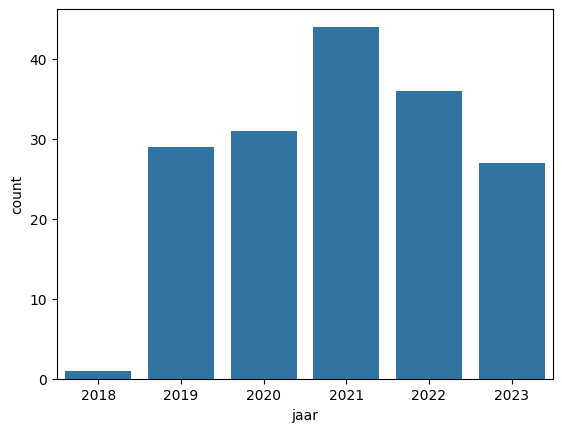

In [4]:
# Create a plot of the number of campaigns per year

df_campagnes["jaar"] = df_campagnes["crm_campagne_startdatum"].dt.year
df_campagnes["maand"] = df_campagnes["crm_campagne_startdatum"].dt.month
df_campagnes["dag"] = df_campagnes["crm_campagne_startdatum"].dt.day

sns.countplot(x="jaar", data=df_campagnes)
plt.show()

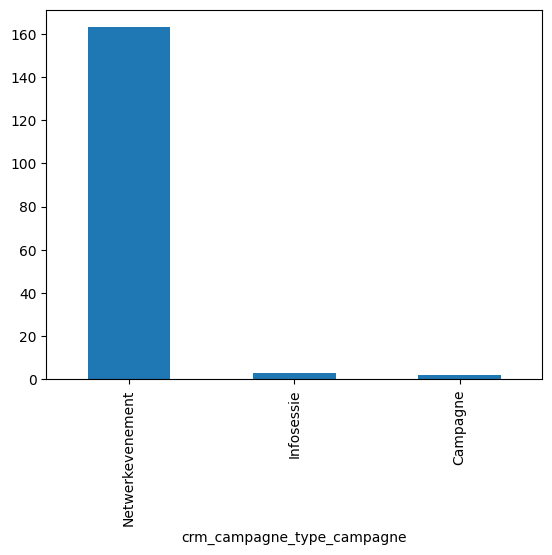

In [5]:
# Create a plot of the total number of campaigns, and the different types of campaigns

df_campagnes["crm_campagne_type_campagne"].value_counts().plot(kind="bar")
plt.show()

## Epic 4

Epic 4: (should have)
• Als een key user kan ik voor een contact met weinig transacties een lookalike met veel transacties identificeren. Ik kan ook een clustering maken van contactpersonen die qua functie, bedrijfseigenschappen, gedrag en (verwacht) gedrag


## Epic 5

Epic 5: (should have)
• Als een key user kan ik voor een campagne een lijst met contacten genereren volgens de waarschijnlijkheid om in te schrijven voor de campagne. Ik wil in de sortering ook ervoor zorgen dat contacten met weinig marketing pressure bevoordeeld worden ten opzichte van contacten met een hoge marketing pressure.


## Epic 7

Epic 7: (nice to have)
• Als een key user kan ik een hypergepersonaliseerde tekst voor een prospectie email laten opstellen, waarbij een aanleiding voor contact wordt vermeld en de meest relevante campagnes en diensten voorgesteld worden
